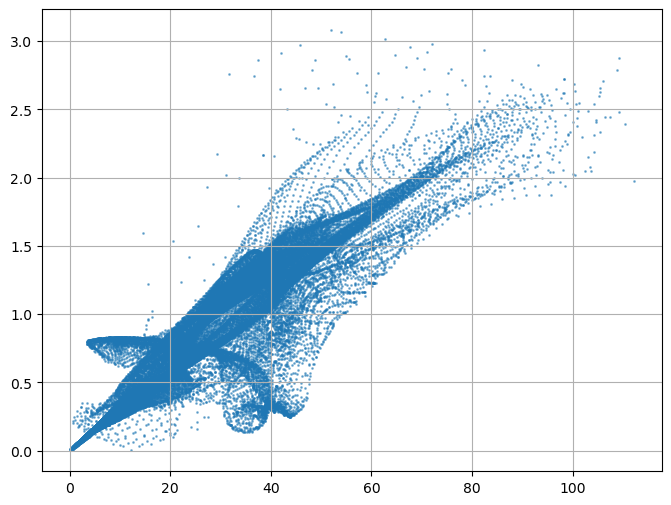

In [2]:
defl_file1 = '../data/JF12_GMFdeflection_Z1_E10EeV.csv'
defl_file2 = '../data/deflexionZ2E510_R2_ra_dec_deg.txt'

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii

defl1 = ascii.read(defl_file1)
defl2 = ascii.read(defl_file2)

plt.figure(figsize=(8, 6))
plt.scatter(defl1['deflection'], defl2['deflexion'], s=1, alpha=0.5)
plt.grid(True)
plt.show()


/tmp/ipykernel_8274/2469791438.py:15: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)


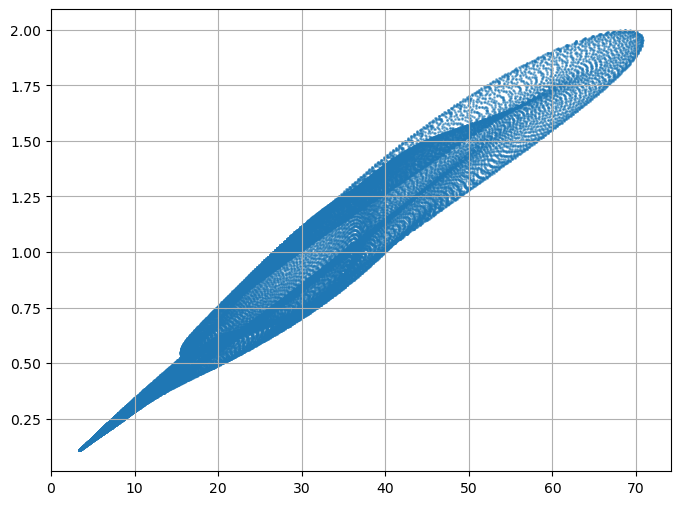

In [12]:
def load_deflection_map(defl_file, fwhm_deg):
    import numpy as np
    import healpy as hp
    data = ascii.read(defl_file)
    pixel_ids = np.asarray(data['pixid'], dtype=int)
    try:
        deflection_data = np.asarray(data['deflection'], dtype=float)
    except KeyError:
        deflection_data = np.asarray(data['deflexion'], dtype=float)
    npix = int(np.max(pixel_ids)) + 1
    nside = hp.npix2nside(npix)
    dmap = np.full(npix, hp.UNSEEN, dtype=float)
    dmap[pixel_ids] = deflection_data
    if fwhm_deg and fwhm_deg > 0:
        dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)
    return dmap, nside

defl1 = load_deflection_map(defl_file1, fwhm_deg=30.0)
defl2 = load_deflection_map(defl_file2, fwhm_deg=30.0)

plt.figure(figsize=(8, 6))
plt.scatter(defl1[0], defl2[0], s=1, alpha=0.5)
plt.grid(True)
plt.show()


/tmp/ipykernel_4101/1425750635.py:18: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)


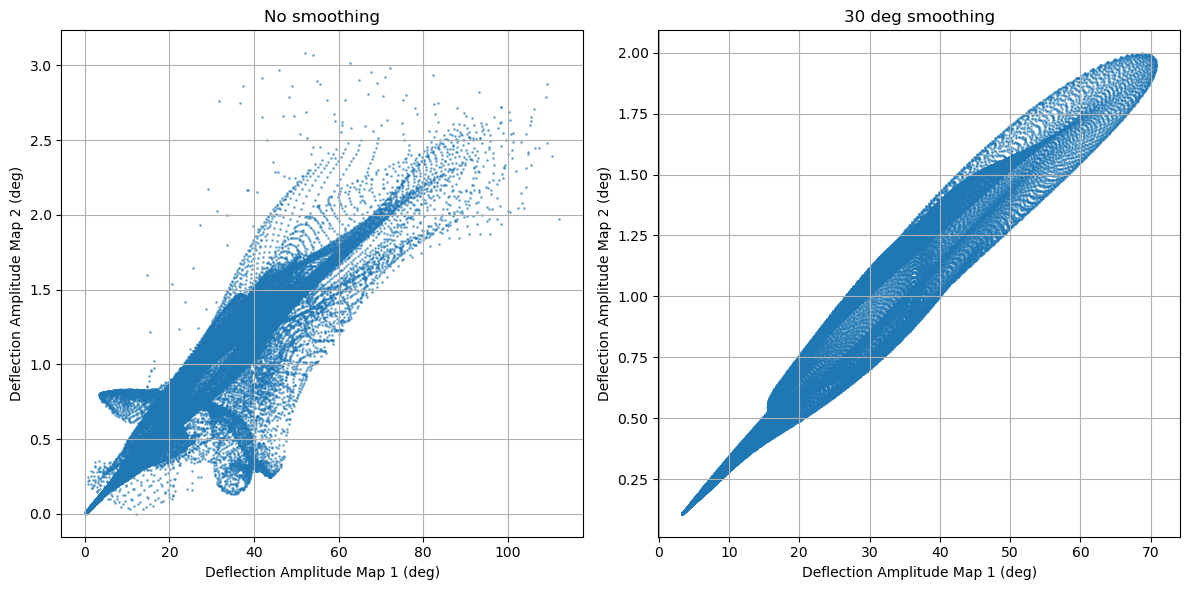

In [8]:
# Make a 2x1 scatter plot with both maps
# showing the two different smoothings
def load_deflection_map(defl_file, fwhm_deg):
    import numpy as np
    import healpy as hp
    from astropy.io import ascii
    data = ascii.read(defl_file)
    pixel_ids = np.asarray(data['pixid'], dtype=int)
    try:
        deflection_data = np.asarray(data['deflection'], dtype=float)
    except KeyError:
        deflection_data = np.asarray(data['deflexion'], dtype=float)
    npix = int(np.max(pixel_ids)) + 1
    nside = hp.npix2nside(npix)
    dmap = np.full(npix, hp.UNSEEN, dtype=float)
    dmap[pixel_ids] = deflection_data
    if fwhm_deg and fwhm_deg > 0:
        dmap = hp.smoothing(dmap, fwhm=np.radians(fwhm_deg), verbose=False)
    return dmap, nside

defl_file1 = '../data/JF12_GMFdeflection_Z1_E10EeV.csv'
defl_file2 = '../data/deflexionZ2E510_R2_ra_dec_deg.txt'

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
dmap1_smooth = load_deflection_map(defl_file1, fwhm_deg=0.0)[0]
dmap2_smooth = load_deflection_map(defl_file2, fwhm_deg=0.0)[0]
ax1.scatter(dmap1_smooth, dmap2_smooth, s=1, alpha=0.5)
ax1.set_title('No smoothing')
dmap1_smooth = load_deflection_map(defl_file1, fwhm_deg=30.0)[0]
dmap2_smooth = load_deflection_map(defl_file2, fwhm_deg=30.0)[0]
ax2.scatter(dmap1_smooth, dmap2_smooth, s=1, alpha=0.5)
ax2.set_title('30 deg smoothing')
ax1.grid(True)
ax2.grid(True)
for ax in [ax1, ax2]:
    ax.set_xlabel('Deflection Amplitude Map 1 (deg)')
    ax.set_ylabel('Deflection Amplitude Map 2 (deg)')
plt.tight_layout()
plt.show()

